In [125]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [131]:
#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [257]:
df = pd.read_csv('netflix_titles.csv')

In [259]:
df.info() #총 7787개의 데이터에서 3, 4, 5, 7, 8 결측치 발생 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [269]:
df.release_year.min() #가장 오래된 출시 년도 1925년
df.release_year.max() #가장 최근 출시 년도 2021년

2021

In [277]:
#데이터 날짜 형식으로 변경
df["date_added"] = pd.to_datetime(df['date_added'],format='mixed')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cats2
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,코로나 후
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",NaN
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",NaN
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,NaN
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,NaN
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",코로나 전
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,코로나 전


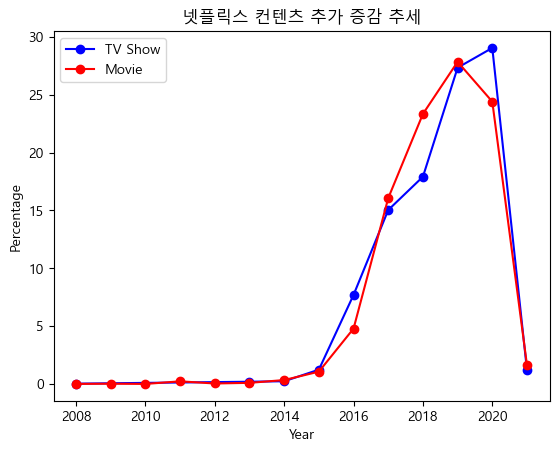

In [373]:
d1 = df[df["type"]=="TV Show"]
d2 = df[df["type"]=="Movie"]
# TV Show
# 년도만 사용(년도만 추출)
vc1 = d1["date_added"].dt.year.value_counts().reset_index()
vc1.columns = ['year','count'] #년도와 갯수 컬럼 생성
vc1['percent'] = vc1['count'].apply(lambda x : (x/sum(vc1['count']) * 100))
vc1 = vc1.sort_values('year')
vc1
# Movie
vc2 = d2["date_added"].dt.year.value_counts().reset_index()
vc2.columns = ['year','count']
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values('year')

plt.plot(vc1['year'], vc1['percent'], label='TV Show', marker='o', color='b')
plt.plot(vc2['year'], vc2['percent'], label='Movie', marker='o', color='r')
plt.title('넷플릭스 컨텐츠 추가 증감 추세')
plt.xlabel('Year')
plt.ylabel('Percentage')

plt.legend()
plt.show()

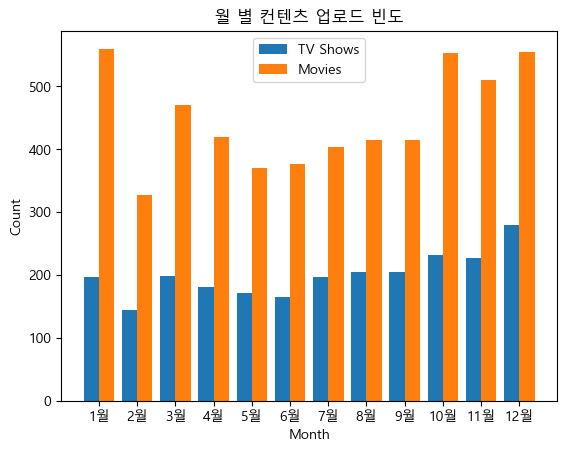

In [369]:
tv = d1["date_added"].dt.month.value_counts().reset_index()
tv.columns = ['month','count']
tv['percent'] = tv['count'].apply(lambda x : 100*x/sum(tv['count']))
tv.sort_values('month')
tv

movie = d2["date_added"].dt.month.value_counts().reset_index()
movie.columns = ['month','count']
movie['percent'] = movie['count'].apply(lambda x : 100*x/sum(movie['count']))
movie.sort_values('month')

plt.bar(tv['month'] - 0.2, tv['count'], width=0.4, label='TV Shows')
plt.bar(movie['month'] + 0.2, movie['count'], width=0.4, label='Movies')

z = np.arange(1, 13)
date = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('월 별 컨텐츠 업로드 빈도')
plt.xticks(z, date)
plt.legend()

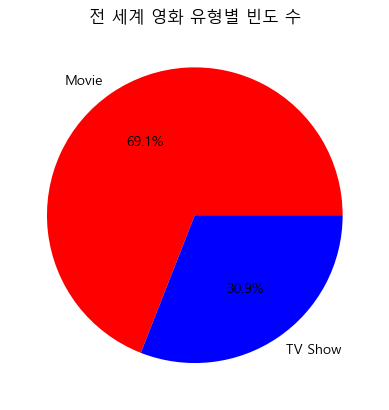

In [472]:
# 데이터에서 'type' 열의 빈도 계산
type_counts = df["type"].value_counts()

# 파이 차트 생성
colors = ['red', 'blue']
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("전 세계 영화 유형별 빈도 수")
plt.show()

In [432]:
#제작국가 별 카운트
df["country"].value_counts() #south Korea 183 명
korea_df = df[df.country == 'South Korea']
korea_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cats2
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,2020-09-08,2020,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",코로나 후
51,s52,TV Show,100 Days My Prince,NaN,"Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...",South Korea,2020-12-07,2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Upon losing his memory, a crown prince encount...",NaN
61,s62,TV Show,12 Years Promise,NaN,"So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui ...",South Korea,2017-05-22,2014,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A pregnant teen is forced by her family to lea...,NaN
81,s82,Movie,2015 Dream Concert,NaN,"4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, I...",South Korea,2017-04-28,2015,TV-PG,107 min,"International Movies, Music & Musicals",The world's biggest K-pop festival marked its ...,NaN
91,s92,Movie,26 Years,Geun-hyun Cho,"Goo Jin, Hye-jin Han, Soo-bin Bae, Seul-ong Im...",South Korea,2017-10-01,2012,TV-MA,135 min,"Dramas, International Movies, Thrillers",Twenty-six years after the 1980 massacre at Gw...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,s7584,TV Show,When the Camellia Blooms,NaN,"Kong Hyo-jin, Kang Ha-neul, Kim Ji-seok, Oh Ju...",South Korea,2019-09-18,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Dongbaek is a single mother. When a potential ...,코로나 전
7601,s7602,TV Show,White Nights,NaN,"Yo-Won Lee, Goo Jin, U-ie, Hae-in Jung, Gook-h...",South Korea,2017-02-14,2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, TV Dr...","A coldhearted heiress, a man from her past and...",NaN
7711,s7712,TV Show,YG Future Strategy Office,NaN,"Seungri, Yoo Byung Jae, Lee Jai-jin, Jinu, Son...",South Korea,2018-10-05,2018,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Co...","K-pop star Seungri, BIGBANG's youngest member,...",NaN
7718,s7719,Movie,Yoo Byung Jae: Discomfort Zone,Y. Joon Chung,Yoo Byung Jae,South Korea,2018-08-17,2018,TV-MA,54 min,Stand-Up Comedy,Daring comedian Yoo Byung-jae connects critici...,NaN


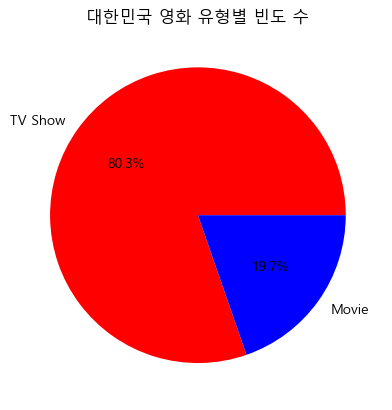

In [474]:
korea_count = korea_df["type"].value_counts()

# 파이 차트 생성
colors = ['red', 'blue']
plt.pie(korea_count, labels=korea_count.index, autopct='%.1f%%', colors=colors)
plt.title("대한민국 영화 유형별 빈도 수")
plt.show()


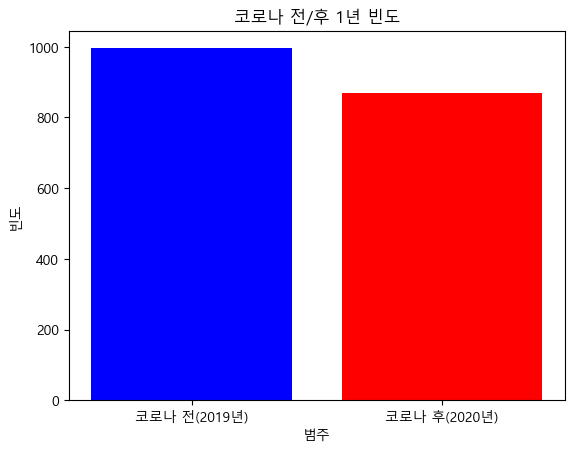

In [448]:
#코로나 전과 후의 컨텐츠 양을 보기 위해 전, 후로 나누려고 했지만, 2020년 이후의 데이터는 2년치 밖에 없어서
#2020년 기준으로 전 1년 후 1년으로 분석
years = df["release_year"]
bins = [2018.5, 2019.5, 2020.5]
labels = ["코로나 전(2019년)", "코로나 후(2020년)"]  
cats = pd.cut(years, bins, labels=labels)

cats_count = cats.value_counts()

# 막대그래프 
plt.bar(cats_count.index, cats_count.values, color=['blue', 'red'])
plt.title("코로나 전/후 1년 빈도")
plt.xlabel("범주")
plt.ylabel("빈도")

plt.show()